# Best Neighborhood In Pittsburgh 
## Roma R Sekhar's Project Notebook

**This Notebook contains a data set analyzing the City of Pittsburgh Playgrounds. Our group's criteria for the best neighborhood in Pittsburgh is to look for childrens’ friendly neighborhoods in Pittsburgh. It will be determined based on the metrics of the number of local parks, courts, rinks, and playgrounds, and playground equipment .Here, I will be analyzing the dataset information on the number of playgrounds and playground equipment. Neighborhoods will be ranked based on certain criteria. The best neighborhood will be a neighborhood with plenty of access to parks, courts, rinks, and playgrounds, and the best quality locations for each. The best neighborhood will be great for promoting exercise, healthy habits, and emotional well being for children. Notice that some parks overlap neighborhoods. For this particular analysis, we have chosen to ignore this piece of information.**


In [1]:
# Importing pandas
import pandas as pd
import numpy as np

##### Loading in the playground data file and Looking at the first 10 items in the Dataset file.

In [2]:
# load in the playground data file
playgrounds_data = pd.read_csv("playground.csv")
# look at the first ten rows of the data
playgrounds_data.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


##### Next, I created a dataframe by filtering the dataset using the ` usecols`function and trying to create a dataset named ` playgrounds_data1` with required columns.


In [3]:
playgrounds_data1 = pd.read_csv("playground.csv",usecols = ['neighborhood','safety_surface_type','equipment_type'])
playgrounds_data1.head(30)


,equipment_type,safety_surface_type,neighborhood
0,Play Area 2 to 5,Pour in Place,Beechview
1,Play Area 2 to 5,SofSurfaces,Allegheny Center
2,Slide,SofSurfaces,Squirrel Hill South
3,Swing 2 Bays,SofSurfaces,Squirrel Hill South
4,Slide,SofSurfaces,Squirrel Hill South
5,Swing 2 Bays,SofSurfaces,Windgap
6,Swing 2 Bays,SofSurfaces,Windgap
7,Play Area 2 to 5,SofSurfaces,Windgap
8,Play Area 5 to 12,SofSurfaces,Windgap
9,Whirl,SofSurfaces,Windgap


##### Next , I performed some data analysis on the playgrounds dataset. I created a `df ` dataframe which contains the neighborhoods that have the total number of playgrounds in each neighborhood without any repeats in the Descending Order. Here, I used the pandas function `.value_counts()` to find the total values for each neighborhood .


In [4]:
df = pd.DataFrame(playgrounds_data['neighborhood'].value_counts())
df

,neighborhood
Squirrel Hill South,32
East Liberty,26
Beechview,21
Allegheny Center,15
South Side Slopes,14
...,...
Esplen,2
Central Oakland,2
Westwood,2
Strip District,1


##### Here is Bar Chart Graph of the Dataframe `df` which shows all the Neighborhoods with its corresponding Number of Playgrounds.

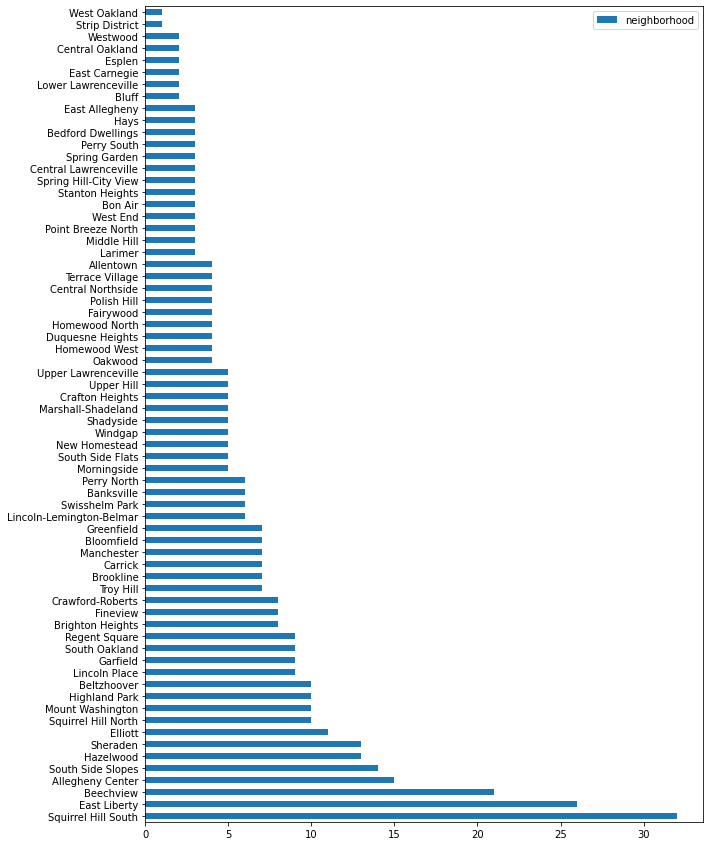

In [5]:
df.plot(kind = 'barh',figsize=(10,15))

**Let's analyze the graph on a broader scale for the best neighborhood for children to live in!!**

**From the graph, we can tell that the neighborhood with the most number of playgrounds is the best neighborhood to live in. Nevertheless, the neighborhood with less number of playgrounds does not mean it is a bad neighborhood , it could be better at something else. Every neighborhood has its own specialty.**

##### Here, I performed a statistical analysis on the `df` dataframe using the pandas `.describe()` function . The average Number of Playgrounds in each neighborhood is 7 and the Maximum and Minimum number of playgrounds are 32 and 1 respectively. 


In [6]:
df.describe()

,neighborhood
count,68.000000
mean,6.544118
std,5.429147
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,32.000000


##### Here, I created another DataFrame named  `df1` that describes the total number of playgrounds in each neighborhood in the playground dataset which is looking at the top 10 neighborhoods .


In [7]:
df1 = pd.DataFrame( playgrounds_data['neighborhood'].value_counts().head(10))
df1

,neighborhood
Squirrel Hill South,32
East Liberty,26
Beechview,21
Allegheny Center,15
South Side Slopes,14
Hazelwood,13
Sheraden,13
Elliott,11
Squirrel Hill North,10
Mount Washington,10


##### Here , I created a Data visualization graph of a Bar Chart using the `.bar()` function of the df1 dataframe of the top 10 neighborhoods which contain the most number of playgrounds .


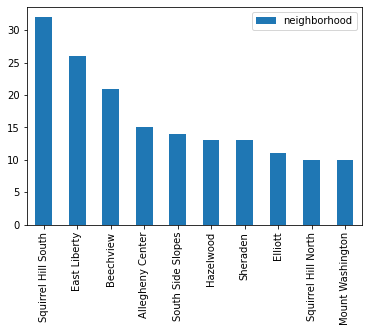

In [8]:
df1.plot.bar()

##### From the above graph, we get to know that `Squirrel Hill South` contains the most number of playgrounds.

##### Here is a Line Plot Graph of the dataframe `df1` which is generated using the pandas function `.plot()`.From the graph  ,We get to know that most of the playgrounds lie between the count of 6 and 7. With `Squirrel Hill South` and `Beechview` having most number of playgrounds .

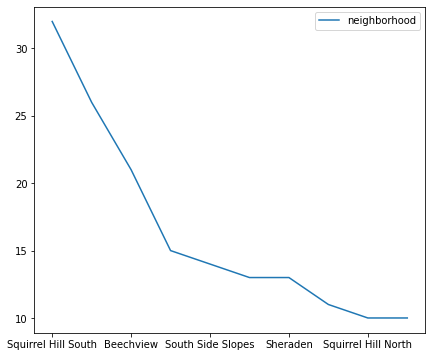

In [9]:
df1.plot(figsize=(7,6))

### The Top Neighborhoods with the most Number of Playgrounds
#####  1. Squirrel Hill South
#####  2. East Liberty
#####  3. Beechview
#####  4. Allegheny Center
#####  5. South Side Slopes
#####  6. Hazelwood
#####  7. Sheraden

##### Here is another analysis of the dataframe `df2` that describes the different types of  `Equipment Type` used in the playgrounds from the Playgrounds dataset.

In [10]:
df2 =  pd.DataFrame(playgrounds_data['equipment_type'].value_counts())
df2

,equipment_type
Play Area 5 to 12,103
Play Area 2 to 5,77
Swing 2 Bays,66
Swing 3 Bays,43
Play Area 2 to 12,25
Whirl,23
Geo Climber,13
Spinner - Cozy Cocoon,11
Slide,9
Swing 4 Bays,9


##### Here is a Bar chart graph showing how many of each Equipment Type is used in the playgrounds.

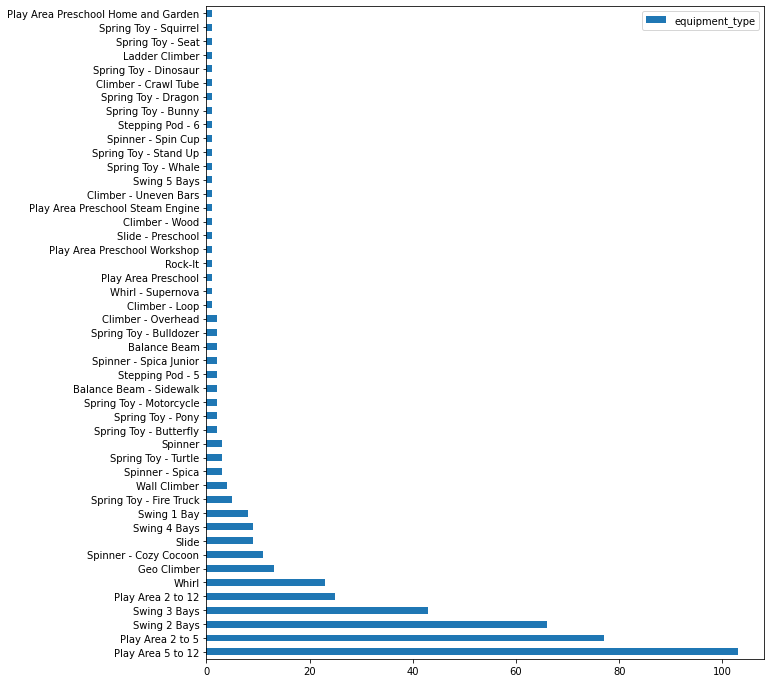

In [11]:
df2.plot(kind = "barh",figsize = (10,12))

### The most used Equipment Types in the Playgrounds
#####  1. Play Area 5 to 12
#####  2. Play Area 2 to 5
#####  3. Swing 2 Bays
#####  4. Swing 3 Bays
#####  5. Play Area 2 to 12


**Using the information I collected along the way about the most commonly used Equipment Type, I decided to put the neighborhoods into categories based on different types of equipment a neighborhood has. I have used the `usecols ` to get the required columns from the dataframe.**

In [12]:
playgrounds_data1 = pd.read_csv("playground.csv",usecols = ['neighborhood','equipment_type'])
df_sort = playgrounds_data1.head(60)
playgrounds_data1.head(15)

,equipment_type,neighborhood
0,Play Area 2 to 5,Beechview
1,Play Area 2 to 5,Allegheny Center
2,Slide,Squirrel Hill South
3,Swing 2 Bays,Squirrel Hill South
4,Slide,Squirrel Hill South
5,Swing 2 Bays,Windgap
6,Swing 2 Bays,Windgap
7,Play Area 2 to 5,Windgap
8,Play Area 5 to 12,Windgap
9,Whirl,Windgap


**After looking at all the neighborhoods, I then found which top neighborhoods from the earlier ranking were in each of the equipment types used. I am using` .groupby()` and` .value_counts()` on the data frame `df_sort ` to see the same .**

In [13]:
df_sort.groupby(['equipment_type','neighborhood']).value_counts().drop(columns='safety_surface_type')

equipment_type           neighborhood       
Play Area 2 to 12        Hazelwood              1
Play Area 2 to 5         Allegheny Center       2
                         Beechview              1
                         Fineview               1
                         Hazelwood              1
                         Lincoln Place          1
                         Oakwood                1
                         Sheraden               2
                         Windgap                1
Play Area 5 to 12        Allegheny Center       1
                         Brookline              1
                         Crafton Heights        1
                         Fineview               1
                         Hazelwood              1
                         Lincoln Place          1
                         New Homestead          1
                         Oakwood                1
                         Perry South            1
                         Sheraden               2
     

##### However, after analyzing this data set, I noticed that the Safety surface type was not listed in equipment type used  , so I decided to create a dataframe `df3` and analyzed this as well.


In [14]:
df3 = pd.DataFrame( playgrounds_data['safety_surface_type'].value_counts())
df3

,safety_surface_type
SofSurfaces,199
Pour in Place,136
Tiles,30
Greenpark Breakfall,17
Engineered Wood Fiber,15


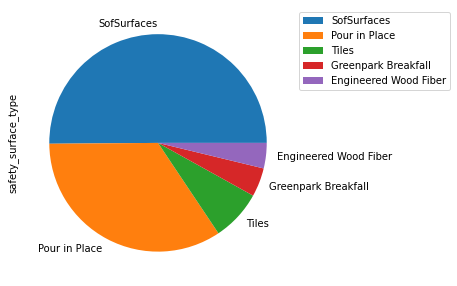

In [15]:
df3.plot.pie(y='safety_surface_type', figsize=(5, 5)).legend(bbox_to_anchor=(1,1))

##### From the generated graph , we get to know that `SofSurfaces`and `Pour in Place` are the most used surface types.

### **Summary of City of Pittsburgh Playgrounds**

**Squirrel Hill South, is in the top rankings for every single category out of all the Neighborhoods. I analyzed that in the Playgrounds Data Set, Squirrel Hill South was ranked first out of all the Neighborhoods, which has 32 Playgrounds and has all the Equipment types like Play Area 5 to 12, Play Area 2 to 5, Swing 2 Bays, etc. With Sofsurface and pour in place surface types also. The Average Number of Playgrounds are 7 Playgrounds per Neighborhood. I can conclude that based on the analysis that I have performed, Squirrel Hill South is the best neighborhood to live in . It has many Playgrounds which is a good place for Children as they have a good opportunity for Outdoor Activities which helps them in their Health, Fitness, and Overall Well Being.**

### Reflection

**Squirrel Hill South, is in the top rankings for every single category out of all the Neighborhoods. Squirrel Hill South has 6 parks and 26 courts/rinks and has 4 different top court/rink types including Basketball (Full), Tennis, Hockey, and Pickleball .Squirrel Hill South was also ranked first in all the categories(Metrics). I analyzed that in the Playgrounds Data Set, Squirrel Hill South was ranked first out of all the Neighborhoods, which has 32 Playgrounds and has all the Equipment types like Play Area 5 to 12, Play Area 2 to 5, Swing 2 Bays, etc. With Sofsurface and pour in place surface types also.The Average Number of Playgrounds is 7 Playgrounds per Neighborhood. I can conclude that based on the analysis that we have performed, Squirrel Hill South is the best neighborhood to live in . It has Multiple facilities like many Parks, courts and Playgrounds which is a good place for Children as they have a good opportunity for Outdoor Activities which helps them in their Health, Fitness, and Overall Well Being .**

